### Q1-3 :
Encoding/Normalization/Scaling

Q1: Refer to the dataset in GitHub: 
https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/01%20Python/gapminder.csv

The “Gapminder” dataset contains the health, life expectancy and GDP information for
multiple countries categorized by “Region”. Use encoding techniques (One hot encoding and
Label encoding) for the category column “Region” and provide your solution in the form of
Jupyter notebook file. Explain which encoding technique should you use and why?

For Q2 and Q3, please follow below description: Let's refer free “Wine” Dataset that is
deposited on the UCI machine learning repository. You can refer to GitHub for this -

https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/01%20Python/wine_data_UCI.csv

The Wine dataset consists of 3 different classes/qualities where each row corresponds to a
particular wine sample. The "quality" features indicate the class/quality of wine and it is
represented as (1, 2, 3) and rest of the columns correspond to 13 different attributes
(features).
Consider the features - the wine quality i.e. "quality", "Alcohol" (percent/volume) and
"Malicacid" (g/l).
Q2: Do you think feature scaling is required? If yes - Why, If no - why?
Q3: If you feel feature scaling is required, then perform Standardization and Normalization and
provide your result. What is the difference you observe between these two methods?

Provide your solution in the form of Jupyter notebook file wherever applicable.


### Q1 - Dataset - Gapminder data; Task - Encoding the Region column

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_gapminder = pd.read_csv('gapminder.csv')

In [13]:
df_gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [14]:
df_gapminder['Region'].value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

In [17]:
#We should use One-Hot Encoding as the features are non-hierarchical (Label encoding is preferred when the features are ordinal)

one_hot_encoded_df_gapminder = pd.get_dummies(df_gapminder, columns = ['Region'], prefix = 'Reg')
one_hot_encoded_df_gapminder.head()


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Reg_America,Reg_East Asia & Pacific,Reg_Europe & Central Asia,Reg_Middle East & North Africa,Reg_South Asia,Reg_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [18]:
#Checking the value counts for America region to match with original
one_hot_encoded_df_gapminder['Reg_America'].value_counts()

#Thus we can see that the count of 27 matches with the original dataframe

0    112
1     27
Name: Reg_America, dtype: int64

In [20]:
#Also carrying out Label Encoding for practice, but recommended one hot encoding only

#Step 1 - Copying the existing dataframe into a new one

label_encoded_df_gapminder = df_gapminder

#Step 2 - Converting the 'Region' column's datatype to 'category'

label_encoded_df_gapminder['Region'] = label_encoded_df_gapminder['Region'].astype('category')

#Step 3 - Applying the Label Encoding method and creating a new column for the codes

label_encoded_df_gapminder['Region_Codes'] = label_encoded_df_gapminder['Region'].cat.codes

#Step 4 - Checking how the codes are being displayed
label_encoded_df_gapminder[['Region','Region_Codes']]


,Region,Region_Codes
0,Middle East & North Africa,3
1,Sub-Saharan Africa,5
2,America,0
3,Europe & Central Asia,2
4,East Asia & Pacific,1
...,...,...
134,America,0
135,Europe & Central Asia,2
136,East Asia & Pacific,1
137,Sub-Saharan Africa,5


In [25]:
#Checking the value counts for Region_codes

print(label_encoded_df_gapminder['Region_Codes'].value_counts())

print('\n')

print(df_gapminder['Region'].value_counts())

2    41
5    40
0    27
1    14
3    10
4     7
Name: Region_Codes, dtype: int64


Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64


### Q2/3 - Dataset - Wine; Task - Standardization / Normalization

For Q2 and Q3, please follow below description: Let's refer free “Wine” Dataset that is
deposited on the UCI machine learning repository. You can refer to GitHub for this -

https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/01%20Python/wine_data_UCI.csv

The Wine dataset consists of 3 different classes/qualities where each row corresponds to a
particular wine sample. The "quality" features indicate the class/quality of wine and it is
represented as (1, 2, 3) and rest of the columns correspond to 13 different attributes
(features).
Consider the features - the wine quality i.e. "quality", "Alcohol" (percent/volume) and
"Malicacid" (g/l).
Q2: Do you think feature scaling is required? If yes - Why, If no - why?
Q3: If you feel feature scaling is required, then perform Standardization and Normalization and
provide your result. What is the difference you observe between these two methods?

Provide your solution in the form of Jupyter notebook file wherever applicable.

In [26]:
df_wine = pd.read_csv('wine_data_UCI.csv')

In [74]:
import seaborn as sns

In [27]:
df_wine.head()

,quality,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
#Since only three features are under consideration, we copy them to a different data frame

feature_list = ['quality','Alcohol','Malicacid']
df2_wine = df_wine[feature_list]

df2_wine.head()

,quality,Alcohol,Malicacid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


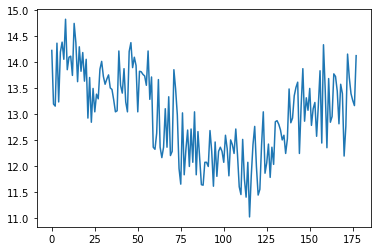

In [29]:
#To answer the question, we also explore via plots
plt.plot(df2_wine['Alcohol'])

C:\Users\NageshN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol'>

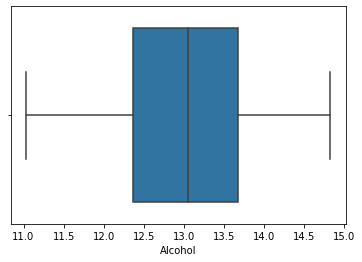

In [75]:
sns.boxplot(df2_wine['Alcohol'])

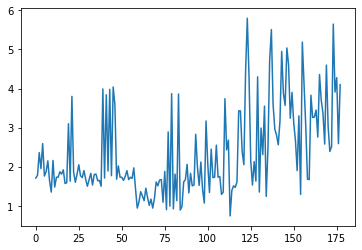

In [30]:
plt.plot(df2_wine['Malicacid'])

C:\Users\NageshN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Malicacid'>

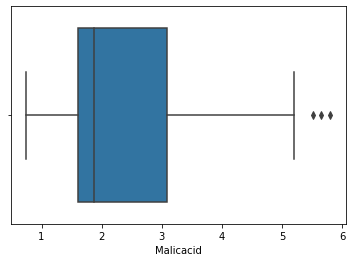

In [76]:
sns.boxplot(df2_wine['Malicacid'])

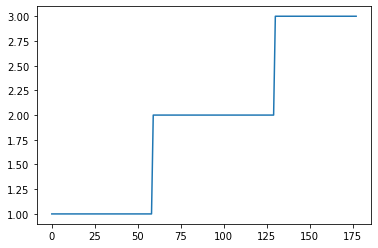

In [31]:
plt.plot(df2_wine['quality'])

C:\Users\NageshN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

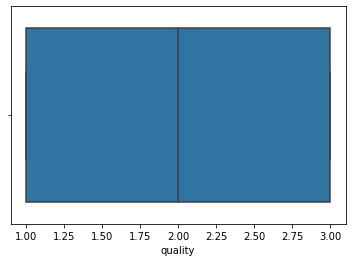

In [77]:
sns.boxplot(df2_wine['quality'])

### Ans 2 - Scaling is required. The reason is that when we calculate how two features are correlated, we may get get very high values. Say a unit movement in Malicacid levels could give a two-unit movement in Alcohol levels, but if they are scaled, the proportional movements would be more accurate and representative. Would recommend Normalization (Min Max) scaling

In [64]:
#Attempting both scaling methods

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Creating a scaling object
ss_object = StandardScaler()
mm_object = MinMaxScaler()

#Fitting the data for Standard Scaling
ss_object.fit(df2_wine[['Alcohol']])
ss_object.fit(df2_wine[['Malicacid']])
ss_object.fit(df2_wine[['quality']])


#Fitting the data for MinMax Scaling / Normalization

mm_object.fit(df2_wine[['Alcohol']])
mm_object.fit(df2_wine[['Malicacid']])
mm_object.fit(df2_wine[['quality']])


#Transforming the data for Standard Scaling
df2_wine['SS_Alcohol'] = ss_object.fit_transform(df2_wine[['Alcohol']])
df2_wine['SS_Malicacid'] = ss_object.fit_transform(df2_wine[['Malicacid']])
df2_wine['SS_quality'] = ss_object.fit_transform(df2_wine[['quality']])


#Transforming the data for MinMax Scaling / Normalization
df2_wine['MM_Alcohol'] = mm_object.fit_transform(df2_wine[['Alcohol']])
df2_wine['MM_Malicacid'] = mm_object.fit_transform(df2_wine[['Malicacid']])
df2_wine['MM_quality'] = mm_object.fit_transform(df2_wine[['quality']])



<ipython-input-64-9a643ad0bfd9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_wine['SS_Alcohol'] = ss_object.fit_transform(df2_wine[['Alcohol']])
<ipython-input-64-9a643ad0bfd9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_wine['SS_Malicacid'] = ss_object.fit_transform(df2_wine[['Malicacid']])
<ipython-input-64-9a643ad0bfd9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [65]:
df2_wine.head()

,quality,Alcohol,Malicacid,SS_Alcohol,SS_Malicacid,SS_quality,MM_Alcohol,MM_Malicacid,MM_quality
0,1,14.23,1.71,1.518613,-0.562250,-1.213944,0.842105,0.191700,0.0
1,1,13.20,1.78,0.246290,-0.499413,-1.213944,0.571053,0.205534,0.0
2,1,13.16,2.36,0.196879,0.021231,-1.213944,0.560526,0.320158,0.0
3,1,14.37,1.95,1.691550,-0.346811,-1.213944,0.878947,0.239130,0.0
4,1,13.24,2.59,0.295700,0.227694,-1.213944,0.581579,0.365613,0.0


In [66]:
df2_wine.describe()

,quality,Alcohol,Malicacid,SS_Alcohol,SS_Malicacid,SS_quality,MM_Alcohol,MM_Malicacid,MM_quality
count,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,-8.619821e-16,-8.357859e-17,-9.056426e-16,0.518584,0.315484,0.469101
std,0.775035,0.811827,1.117146,1.002821e+00,1.002821e+00,1.002821e+00,0.213639,0.220780,0.387517
min,1.000000,11.030000,0.740000,-2.434235e+00,-1.432983e+00,-1.213944e+00,0.000000,0.000000,0.000000
25%,1.000000,12.362500,1.602500,-7.882448e-01,-6.587486e-01,-1.213944e+00,0.350658,0.170455,0.000000
50%,2.000000,13.050000,1.865000,6.099988e-02,-4.231120e-01,7.996036e-02,0.531579,0.222332,0.500000
75%,3.000000,13.677500,3.082500,8.361286e-01,6.697929e-01,1.373864e+00,0.696711,0.462945,1.000000
max,3.000000,14.830000,5.800000,2.259772e+00,3.109192e+00,1.373864e+00,1.000000,1.000000,1.000000


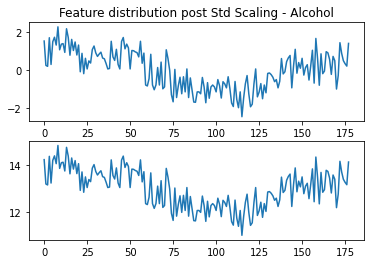

In [67]:
fig, axs = plt.subplots(2)
#fig.suptitle('Comparision of Alcohol and Scaled Alcohol data')
axs[0].set_title('Feature distribution post Std Scaling - Alcohol')
axs[0].plot(df2_wine['SS_Alcohol'])
axs[1].plot(df2_wine['Alcohol'])


plt.show()

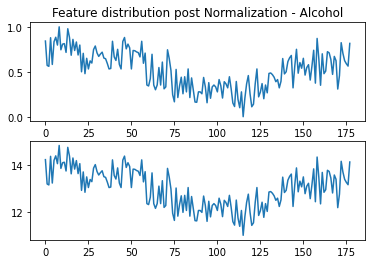

In [68]:
fig, axs = plt.subplots(2)
#fig.suptitle('Comparision of Alcohol and Scaled Alcohol data')
axs[0].set_title('Feature distribution post Normalization - Alcohol')
axs[0].plot(df2_wine['MM_Alcohol'])
axs[1].plot(df2_wine['Alcohol'])


plt.show()

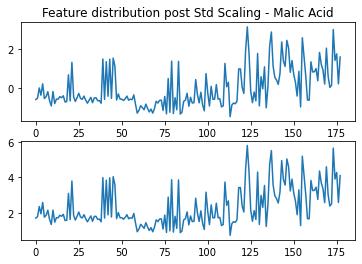

In [69]:
fig, axs = plt.subplots(2)

axs[0].set_title('Feature distribution post Std Scaling - Malic Acid')
axs[0].plot(df2_wine['SS_Malicacid'])
axs[1].plot(df2_wine['Malicacid'])

plt.show()

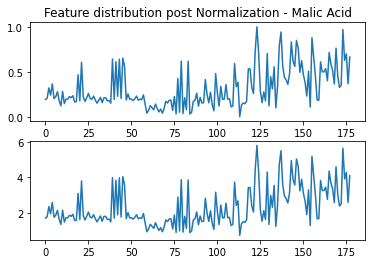

In [70]:
fig, axs = plt.subplots(2)

axs[0].set_title('Feature distribution post Normalization - Malic Acid')
axs[0].plot(df2_wine['MM_Malicacid'])
axs[1].plot(df2_wine['Malicacid'])

plt.show()

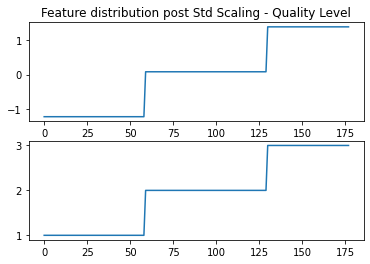

In [71]:
fig, axs = plt.subplots(2)

axs[0].set_title('Feature distribution post Std Scaling - Quality Level')
axs[0].plot(df2_wine['SS_quality'])
axs[1].plot(df2_wine['quality'])

plt.show()

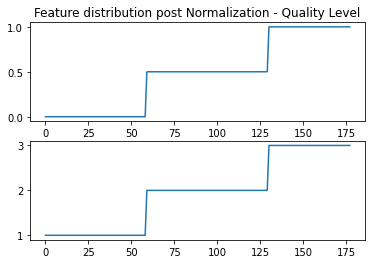

In [72]:
fig, axs = plt.subplots(2)

axs[0].set_title('Feature distribution post Normalization - Quality Level')
axs[0].plot(df2_wine['MM_quality'])
axs[1].plot(df2_wine['quality'])

plt.show()

In [73]:
df2_wine.describe()

,quality,Alcohol,Malicacid,SS_Alcohol,SS_Malicacid,SS_quality,MM_Alcohol,MM_Malicacid,MM_quality
count,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,-8.619821e-16,-8.357859e-17,-9.056426e-16,0.518584,0.315484,0.469101
std,0.775035,0.811827,1.117146,1.002821e+00,1.002821e+00,1.002821e+00,0.213639,0.220780,0.387517
min,1.000000,11.030000,0.740000,-2.434235e+00,-1.432983e+00,-1.213944e+00,0.000000,0.000000,0.000000
25%,1.000000,12.362500,1.602500,-7.882448e-01,-6.587486e-01,-1.213944e+00,0.350658,0.170455,0.000000
50%,2.000000,13.050000,1.865000,6.099988e-02,-4.231120e-01,7.996036e-02,0.531579,0.222332,0.500000
75%,3.000000,13.677500,3.082500,8.361286e-01,6.697929e-01,1.373864e+00,0.696711,0.462945,1.000000
max,3.000000,14.830000,5.800000,2.259772e+00,3.109192e+00,1.373864e+00,1.000000,1.000000,1.000000


### Ans - There can be two key criteria of choosing the right approach. Standard deviation and Outliers. 
In case of 'Alchohol' the boxplot reveals no outliers, but in case of 'Malic Acid', there are a few outliers. 
For Malic acid we can use Standardization and in case of 'Alcohol' we can use Normalization. 

But it would be better to use same scaling technique for both if we want to do a correlation analysis. Hence Normalization is a better approach. It also has a lower standard deviation in comparision to the Standardized features' data sets. 